In [76]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

# Esercitazione 11

## Esercizio 11.1

In [2]:
#funzione target è 2x+1 ergo i parametri target sono
m=2
b=1

#genero 4 modelli (a,b,c,d) tc due a due hanno un parametro comune
#noise gaussiano
a_sigma=0.3
b_sigma=a_sigma
c_sigma=0.8
d_sigma=c_sigma

#genero dati di training
a_n_train=500
b_n_train=1000
c_n_train=a_n_train
d_n_train=b_n_train

np.random.seed(0)

a_x_train=np.random.uniform(-1, 1, a_n_train)
a_y_train=np.random.normal(m*a_x_train+b, a_sigma) #effettivi dati per il training

b_x_train=np.random.uniform(-1, 1, b_n_train)
b_y_train=np.random.normal(m*b_x_train+b, b_sigma)

c_x_train=np.random.uniform(-1, 1, c_n_train)
c_y_train=np.random.normal(m*c_x_train+b, c_sigma)

d_x_train=np.random.uniform(-1, 1, d_n_train)
d_y_train=np.random.normal(m*d_x_train+b, d_sigma)

#genero dati di validazione
a_x_valid=np.random.uniform(-1, 1, int(a_n_train/10))
a_y_valid=np.random.normal(m*a_x_valid+b, a_sigma) #effettivi dati per la validazione

b_x_valid=np.random.uniform(-1, 1, int(b_n_train/10))
b_y_valid=np.random.normal(m*b_x_valid+b, b_sigma)

c_x_valid=np.random.uniform(-1, 1, int(c_n_train/10))
c_y_valid=np.random.normal(m*c_x_valid+b, c_sigma)

d_x_valid=np.random.uniform(-1, 1, int(d_n_train/10))
d_y_valid=np.random.normal(m*d_x_valid+b, d_sigma)

#genero anche punti target (i.e., ideali)
a_y_target=m*a_x_valid+b
b_y_target=m*b_x_valid+b
c_y_target=m*c_x_valid+b
d_y_target=m*d_x_valid+b

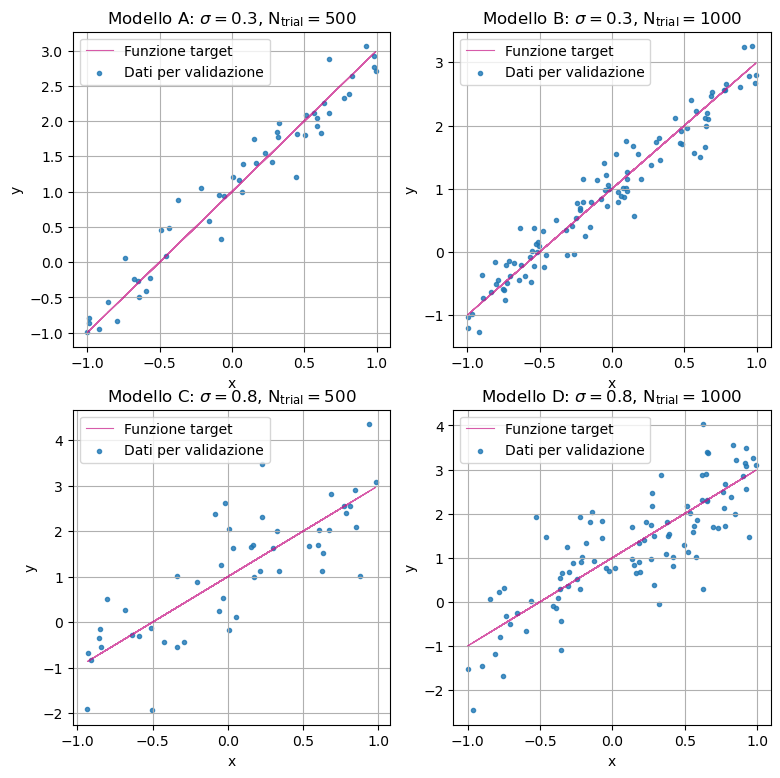

In [3]:
#plot con dati di validazione e training
dfig, dplt = plt.subplots(2, 2, figsize=(9, 9))

(dplt1, dplt2), (dplt3, dplt4) = dplt

dplt1.plot(a_x_valid, a_y_target, color='mediumvioletred', label='Funzione target', linewidth=0.8, alpha=0.7)
dplt1.scatter(a_x_valid, a_y_valid, label='Dati per validazione', marker='.', alpha=0.8)
dplt1.set_xlabel('x')
dplt1.set_ylabel('y')
dplt1.set_title(r'Modello A: $\sigma=0.3$, $\mathrm{N_{trial}}=500$')
dplt1.legend()
dplt1.grid(True)

dplt2.plot(b_x_valid, b_y_target, color='mediumvioletred', label='Funzione target', linewidth=0.8, alpha=0.7)
dplt2.scatter(b_x_valid, b_y_valid, label='Dati per validazione', marker='.', alpha=0.8)
dplt2.set_xlabel('x')
dplt2.set_ylabel('y')
dplt2.set_title(r'Modello B: $\sigma=0.3$, $\mathrm{N_{trial}}=1000$')
dplt2.legend()
dplt2.grid(True)

dplt3.plot(c_x_valid, c_y_target, color='mediumvioletred', label='Funzione target', linewidth=0.8, alpha=0.7)
dplt3.scatter(c_x_valid, c_y_valid, label='Dati per validazione', marker='.', alpha=0.8)
dplt3.set_xlabel('x')
dplt3.set_ylabel('y')
dplt3.set_title(r'Modello C: $\sigma=0.8$, $\mathrm{N_{trial}}=500$')
dplt3.legend()
dplt3.grid(True)

dplt4.plot(d_x_valid, d_y_target, color='mediumvioletred', label='Funzione target', linewidth=0.8, alpha=0.7)
dplt4.scatter(d_x_valid, d_y_valid, label='Dati per validazione', marker='.', alpha=0.8)
dplt4.set_xlabel('x')
dplt4.set_ylabel('y')
dplt4.set_title(r'Modello D: $\sigma=0.8$, $\mathrm{N_{trial}}=1000$')
dplt4.legend()
dplt4.grid(True)

plt.show()

### $\mathrm{N_{epoche}}=30$

#### Modello A

In [4]:
#compilazione e fitting
af_model=tf.keras.Sequential()
af_model.add(Input(shape=(1,)))
af_model.add(Dense(1))
af_model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
af_model.summary()

af_history=af_model.fit(x=a_x_train, y=a_y_train, 
          batch_size=32, epochs=30,
          shuffle=True,
          validation_data=(a_x_valid, a_y_valid))

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 1.4382 - mse: 1.4382 - val_loss: 1.1361 - val_mse: 1.1361
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.9465 - mse: 0.9465 - val_loss: 0.7668 - val_mse: 0.7668
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6620 - mse: 0.6620 - val_loss: 0.5367 - val_mse: 0.5367
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4882 - mse: 0.4882 - val_loss: 0.3924 - val_mse: 0.3924
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4129 - mse: 0.4129 - val_loss: 0.2984 - val_mse: 0.2984
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2911 - mse: 0.2911 - val_loss: 0.2351 - val_mse: 0.2351
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2453 - mse: 0.2453 - val_loss: 0.1909 - val_mse: 0.1909
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2122 - mse: 0.2122 - val_loss: 0.1588 - val_mse: 0.1588
Epoch 9/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1936 - mse:

In [5]:
#valutazione del modello A con il dataset di validazione e i dati di target
af_model.get_weights()

print('Modello A, 30 epoche, dataset validazione')
af_score=af_model.evaluate(a_x_valid, a_y_valid, batch_size=32, verbose=1)
print('Test loss:', af_score[0])
print('Test accuracy:', af_score[1])

print('Modello A, 30 epoche, dataset target')
af_score=af_model.evaluate(a_x_valid, a_y_target, batch_size=32, verbose=1)
print('Test loss:', af_score[0])
print('Test accuracy:', af_score[1])

Modello A, 30 epoche, dataset validazione
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0752 - mse: 0.0752  
Test loss: 0.07344473153352737
Test accuracy: 0.07344473153352737
Modello A, 30 epoche, dataset target
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0017 - mse: 0.0017 
Test loss: 0.0018708952702581882
Test accuracy: 0.0018708952702581882


#### Modello B

In [6]:
#compilazione e fitting
bf_model=tf.keras.Sequential()
bf_model.add(Input(shape=(1,)))
bf_model.add(Dense(1))
bf_model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
bf_model.summary()

bf_history=bf_model.fit(x=b_x_train, y=b_y_train, 
          batch_size=32, epochs=30,
          shuffle=True,
          validation_data=(b_x_valid, b_y_valid))

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.8703 - mse: 0.8703 - val_loss: 0.3379 - val_mse: 0.3379
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3097 - mse: 0.3097 - val_loss: 0.1463 - val_mse: 0.1463
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1486 - mse: 0.1486 - val_loss: 0.0938 - val_mse: 0.0938
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1087 - mse: 0.1087 - val_loss: 0.0800 - val_mse: 0.0800
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0870 - mse: 0.0870 - val_loss: 0.0765 - val_mse: 0.0765
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0908 - mse: 0.0908 - val_loss: 0.0760 - val_mse: 0.0760
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0898 - mse: 0.0898 - val_loss: 0.0760 - val_mse: 0.0760
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0822 - mse: 0.0822 - val_loss: 0.0762 - val_mse: 0.0762
Epoch 9/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0841 - mse:

In [7]:
#valutazione del modello B con il dataset di validazione e i dati di target
bf_model.get_weights()

print('Modello B, 30 epoche, dataset validazione')
bf_score=bf_model.evaluate(b_x_valid, b_y_valid, batch_size=32, verbose=1)
print('Test loss:', bf_score[0])
print('Test accuracy:', bf_score[1])

print('Modello B, 30 epoche, dataset target')
bf_score=bf_model.evaluate(b_x_valid, b_y_target, batch_size=32, verbose=1)
print('Test loss:', bf_score[0])
print('Test accuracy:', bf_score[1])

Modello B, 30 epoche, dataset validazione
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0851 - mse: 0.0851 
Test loss: 0.07781657576560974
Test accuracy: 0.07781657576560974
Modello B, 30 epoche, dataset target
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3201e-04 - mse: 1.3201e-04 
Test loss: 0.00013135551125742495
Test accuracy: 0.00013135551125742495


#### Modello C

In [8]:
#compilazione e fitting
cf_model=tf.keras.Sequential()
cf_model.add(Input(shape=(1,)))
cf_model.add(Dense(1))
cf_model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
cf_model.summary()

cf_history=cf_model.fit(x=c_x_train, y=c_y_train, 
          batch_size=32, epochs=30,
          shuffle=True,
          validation_data=(c_x_valid, c_y_valid))

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 2.7362 - mse: 2.7362 - val_loss: 2.4920 - val_mse: 2.4920
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.0707 - mse: 2.0707 - val_loss: 2.0007 - val_mse: 2.0007
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.7571 - mse: 1.7571 - val_loss: 1.6701 - val_mse: 1.6701
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.3984 - mse: 1.3984 - val_loss: 1.4395 - val_mse: 1.4395
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.2866 - mse: 1.2866 - val_loss: 1.2682 - val_mse: 1.2682
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.1769 - mse: 1.1769 - val_loss: 1.1391 - val_mse: 1.1391
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0703 - mse: 1.0703 - val_loss: 1.0405 - val_mse: 1.0405
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.9708 - mse: 0.9708 - val_loss: 0.9639 - val_mse: 0.9639
Epoch 9/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.9208 -

In [9]:
#valutazione del modello C con il dataset di validazione e i dati di target
cf_model.get_weights()

print('Modello C, 30 epoche, dataset validazione')
cf_score=bf_model.evaluate(c_x_valid, c_y_valid, batch_size=32, verbose=1)
print('Test loss:', cf_score[0])
print('Test accuracy:', cf_score[1])

print('Modello C, 30 epoche, dataset target')
cf_score=cf_model.evaluate(c_x_valid, c_y_target, batch_size=32, verbose=1)
print('Test loss:', cf_score[0])
print('Test accuracy:', cf_score[1])

Modello C, 30 epoche, dataset validazione
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6786 - mse: 0.6786 
Test loss: 0.6588655710220337
Test accuracy: 0.6588655710220337
Modello C, 30 epoche, dataset target
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0138 - mse: 0.0138 
Test loss: 0.013260824605822563
Test accuracy: 0.013260824605822563


#### Modello D

In [10]:
#compilazione e fitting
df_model=tf.keras.Sequential()
df_model.add(Input(shape=(1,)))
df_model.add(Dense(1))
df_model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
df_model.summary()

df_history=df_model.fit(x=d_x_train, y=d_y_train, 
          batch_size=32, epochs=30,
          shuffle=True,
          validation_data=(d_x_valid, d_y_valid))

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.9827 - mse: 1.9827 - val_loss: 1.4001 - val_mse: 1.4001
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.1838 - mse: 1.1838 - val_loss: 0.9512 - val_mse: 0.9512
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.9506 - mse: 0.9506 - val_loss: 0.7640 - val_mse: 0.7640
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8769 - mse: 0.8769 - val_loss: 0.6680 - val_mse: 0.6680
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7461 - mse: 0.7461 - val_loss: 0.6160 - val_mse: 0.6160
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6780 - mse: 0.6780 - val_loss: 0.5832 - val_mse: 0.5832
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6981 - mse: 0.6981 - val_loss: 0.5654 - val_mse: 0.5654
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6718 - mse: 0.6718 - val_loss: 0.5557 - val_mse: 0.5557
Epoch 9/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6998 - mse

In [11]:
#valutazione del modello D con il dataset di validazione e i dati di target
df_model.get_weights()

print('Modello D, 30 epoche, dataset validazione')
df_score=bf_model.evaluate(d_x_valid, d_y_valid, batch_size=32, verbose=1)
print('Test loss:', df_score[0])
print('Test accuracy:', df_score[1])

print('Modello D, 30 epoche, dataset target')
df_score=cf_model.evaluate(d_x_valid, d_y_target, batch_size=32, verbose=1)
print('Test loss:', df_score[0])
print('Test accuracy:', df_score[1])

Modello D, 30 epoche, dataset validazione
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5485 - mse: 0.5485  
Test loss: 0.5469595789909363
Test accuracy: 0.5469595789909363
Modello D, 30 epoche, dataset target
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0127 - mse: 0.0127  
Test loss: 0.013025645166635513
Test accuracy: 0.013025645166635513


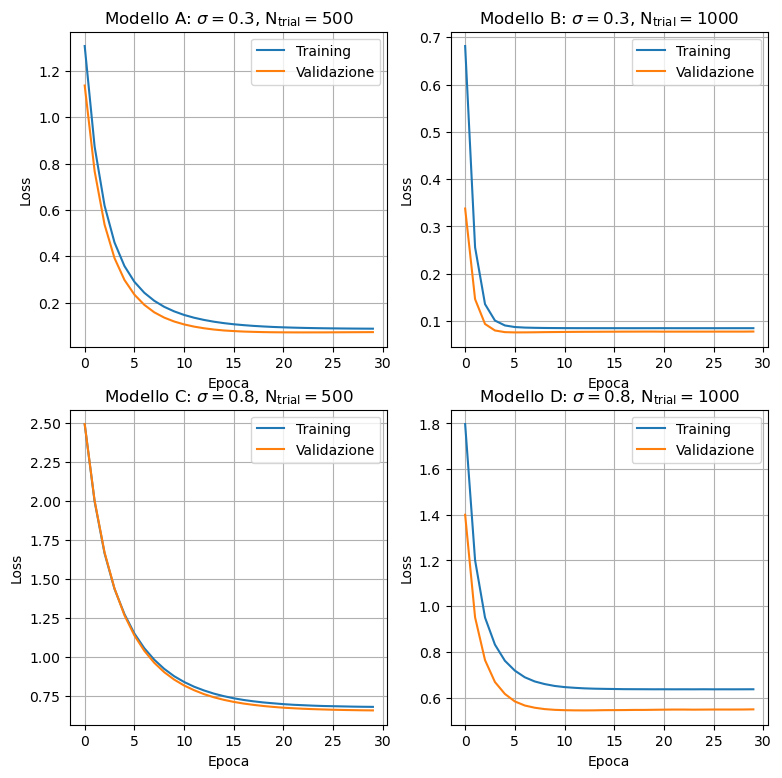

In [12]:
#plot dei valori della loss function di training vs validazione
lffig, lfplt = plt.subplots(2, 2, figsize=(9, 9))

(lfplt1, lfplt2), (lfplt3, lfplt4) = lfplt

lfplt1.plot(af_history.history['loss'])
lfplt1.plot(af_history.history['val_loss'])
lfplt1.set_title(r'Modello A: $\sigma=0.3$, $\mathrm{N_{trial}}=500$')
lfplt1.set_ylabel('Loss')
lfplt1.set_xlabel('Epoca')
lfplt1.legend(['Training', 'Validazione'], loc='best')
lfplt1.grid(True)

lfplt2.plot(bf_history.history['loss'])
lfplt2.plot(bf_history.history['val_loss'])
lfplt2.set_title(r'Modello B: $\sigma=0.3$, $\mathrm{N_{trial}}=1000$')
lfplt2.set_ylabel('Loss')
lfplt2.set_xlabel('Epoca')
lfplt2.legend(['Training', 'Validazione'], loc='best')
lfplt2.grid(True)

lfplt3.plot(cf_history.history['loss'])
lfplt3.plot(cf_history.history['val_loss'])
lfplt3.set_title(r'Modello C: $\sigma=0.8$, $\mathrm{N_{trial}}=500$')
lfplt3.set_ylabel('Loss')
lfplt3.set_xlabel('Epoca')
lfplt3.legend(['Training', 'Validazione'], loc='best')
lfplt3.grid(True)

lfplt4.plot(df_history.history['loss'])
lfplt4.plot(df_history.history['val_loss'])
lfplt4.set_title(r'Modello D: $\sigma=0.8$, $\mathrm{N_{trial}}=1000$')
lfplt4.set_ylabel('Loss')
lfplt4.set_xlabel('Epoca')
lfplt4.legend(['Training', 'Validazione'], loc='best')
lfplt4.grid(True)

plt.show()

### $\mathrm{N_{epoche}}=80$

#### Modello A

In [13]:
#compilazione e fitting
as_model=tf.keras.Sequential()
as_model.add(Input(shape=(1,)))
as_model.add(Dense(1))
as_model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
as_model.summary()

as_history=as_model.fit(x=a_x_train, y=a_y_train, 
          batch_size=32, epochs=80,
          shuffle=True,
          validation_data=(a_x_valid, a_y_valid))

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 3.4389 - mse: 3.4389 - val_loss: 2.9488 - val_mse: 2.9488
Epoch 2/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.4455 - mse: 2.4455 - val_loss: 2.1988 - val_mse: 2.1988
Epoch 3/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.1824 - mse: 2.1824 - val_loss: 1.6788 - val_mse: 1.6788
Epoch 4/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.5917 - mse: 1.5917 - val_loss: 1.3011 - val_mse: 1.3011
Epoch 5/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.3018 - mse: 1.3018 - val_loss: 1.0162 - val_mse: 1.0162
Epoch 6/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.9623 - mse: 0.9623 - val_loss: 0.8025 - val_mse: 0.8025
Epoch 7/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.8107 - mse: 0.8107 - val_loss: 0.6377 - val_mse: 0.6377
Epoch 8/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.5849 - mse: 0.5849 - val_loss: 0.5109 - val_mse: 0.5109
Epoch 9/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.5550 -

In [14]:
#valutazione del modello A con il dataset di validazione e i dati di target
as_model.get_weights()

print('Modello A, 80 epoche, dataset validazione')
as_score=as_model.evaluate(a_x_valid, a_y_valid, batch_size=32, verbose=1)
print('Test loss:', as_score[0])
print('Test accuracy:', as_score[1])

print('Modello A, 30 epoche, dataset target')
as_score=as_model.evaluate(a_x_valid, a_y_target, batch_size=32, verbose=1)
print('Test loss:', as_score[0])
print('Test accuracy:', as_score[1])

Modello A, 80 epoche, dataset validazione
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0777 - mse: 0.0777 
Test loss: 0.07653990387916565
Test accuracy: 0.07653990387916565
Modello A, 30 epoche, dataset target
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.7923e-04 - mse: 8.7923e-04  
Test loss: 0.0008647476206533611
Test accuracy: 0.0008647476206533611


#### Modello B

In [15]:
#compilazione e fitting
bs_model=tf.keras.Sequential()
bs_model.add(Input(shape=(1,)))
bs_model.add(Dense(1))
bs_model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
bs_model.summary()

bs_history=bs_model.fit(x=b_x_train, y=b_y_train, 
          batch_size=32, epochs=80,
          shuffle=True,
          validation_data=(b_x_valid, b_y_valid))

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/80
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.4632 - mse: 4.4632 - val_loss: 2.2804 - val_mse: 2.2804
Epoch 2/80
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.5918 - mse: 2.5918 - val_loss: 1.4134 - val_mse: 1.4134
Epoch 3/80
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.6422 - mse: 1.6422 - val_loss: 0.9096 - val_mse: 0.9096
Epoch 4/80
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0353 - mse: 1.0353 - val_loss: 0.5928 - val_mse: 0.5928
Epoch 5/80
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6471 - mse: 0.6471 - val_loss: 0.4006 - val_mse: 0.4006
Epoch 6/80
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4479 - mse: 0.4479 - val_loss: 0.2771 - val_mse: 0.2771
Epoch 7/80
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3404 - mse: 0.3404 - val_loss: 0.1992 - val_mse: 0.1992
Epoch 8/80
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2473 - mse: 0.2473 - val_loss: 0.1498 - val_mse: 0.1498
Epoch 9/80
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1878 - mse:

In [16]:
#valutazione del modello B con il dataset di validazione e i dati di target
bs_model.get_weights()

print('Modello B, 80 epoche, dataset validazione')
bs_score=bf_model.evaluate(b_x_valid, b_y_valid, batch_size=32, verbose=1)
print('Test loss:', bs_score[0])
print('Test accuracy:', bs_score[1])

print('Modello B, 80 epoche, dataset target')
bs_score=bf_model.evaluate(b_x_valid, b_y_target, batch_size=32, verbose=1)
print('Test loss:', bs_score[0])
print('Test accuracy:', bs_score[1])

Modello B, 80 epoche, dataset validazione
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0851 - mse: 0.0851 
Test loss: 0.07781657576560974
Test accuracy: 0.07781657576560974
Modello B, 80 epoche, dataset target
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3201e-04 - mse: 1.3201e-04 
Test loss: 0.00013135551125742495
Test accuracy: 0.00013135551125742495


#### Modello C

In [17]:
#compilazione e fitting
cs_model=tf.keras.Sequential()
cs_model.add(Input(shape=(1,)))
cs_model.add(Dense(1))
cs_model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
cs_model.summary()

cs_history=cs_model.fit(x=c_x_train, y=c_y_train, 
          batch_size=32, epochs=80,
          shuffle=True,
          validation_data=(c_x_valid, c_y_valid))

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 4.6960 - mse: 4.6960 - val_loss: 4.2231 - val_mse: 4.2231
Epoch 2/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.4674 - mse: 3.4674 - val_loss: 3.4213 - val_mse: 3.4213
Epoch 3/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.8069 - mse: 2.8069 - val_loss: 2.8263 - val_mse: 2.8263
Epoch 4/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.3936 - mse: 2.3936 - val_loss: 2.3749 - val_mse: 2.3749
Epoch 5/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0425 - mse: 2.0425 - val_loss: 2.0341 - val_mse: 2.0341
Epoch 6/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.9002 - mse: 1.9002 - val_loss: 1.7639 - val_mse: 1.7639
Epoch 7/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5573 - mse: 1.5573 - val_loss: 1.5468 - val_mse: 1.5468
Epoch 8/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.3931 - mse: 1.3931 - val_loss: 1.3743 - val_mse: 1.3743
Epoch 9/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.2297 - mse:

In [18]:
#valutazione del modello C con il dataset di validazione e i dati di target
cs_model.get_weights()

print('Modello C, 80 epoche, dataset validazione')
cs_score=bf_model.evaluate(c_x_valid, c_y_valid, batch_size=32, verbose=1)
print('Test loss:', cs_score[0])
print('Test accuracy:', cs_score[1])

print('Modello C, 80 epoche, dataset target')
cs_score=cf_model.evaluate(c_x_valid, c_y_target, batch_size=32, verbose=1)
print('Test loss:', cs_score[0])
print('Test accuracy:', cs_score[1])

Modello C, 80 epoche, dataset validazione
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6786 - mse: 0.6786  
Test loss: 0.6588655710220337
Test accuracy: 0.6588655710220337
Modello C, 80 epoche, dataset target
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0138 - mse: 0.0138  
Test loss: 0.013260824605822563
Test accuracy: 0.013260824605822563


#### Modello D

In [19]:
#compilazione e fitting
ds_model=tf.keras.Sequential()
ds_model.add(Input(shape=(1,)))
ds_model.add(Dense(1))
ds_model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
ds_model.summary()

ds_history=ds_model.fit(x=d_x_train, y=d_y_train, 
          batch_size=32, epochs=80,
          shuffle=True,
          validation_data=(d_x_valid, d_y_valid))

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/80
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.6888 - mse: 1.6888 - val_loss: 1.0673 - val_mse: 1.0673
Epoch 2/80
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0229 - mse: 1.0229 - val_loss: 0.7569 - val_mse: 0.7569
Epoch 3/80
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7588 - mse: 0.7588 - val_loss: 0.6436 - val_mse: 0.6436
Epoch 4/80
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7343 - mse: 0.7343 - val_loss: 0.5938 - val_mse: 0.5938
Epoch 5/80
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6687 - mse: 0.6687 - val_loss: 0.5691 - val_mse: 0.5691
Epoch 6/80
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7424 - mse: 0.7424 - val_loss: 0.5561 - val_mse: 0.5561
Epoch 7/80
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6370 - mse: 0.6370 - val_loss: 0.5503 - val_mse: 0.5503
Epoch 8/80
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6226 - mse: 0.6226 - val_loss: 0.5468 - val_mse: 0.5468
Epoch 9/80
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.6577 - mse:

In [20]:
#valutazione del modello D con il dataset di validazione e i dati di target
ds_model.get_weights()

print('Modello D, 80 epoche, dataset validazione')
ds_score=ds_model.evaluate(d_x_valid, d_y_valid, batch_size=32, verbose=1)
print('Test loss:', ds_score[0])
print('Test accuracy:', ds_score[1])

print('Modello D, 80 epoche, dataset target')
ds_score=ds_model.evaluate(d_x_valid, d_y_target, batch_size=32, verbose=1)
print('Test loss:', ds_score[0])
print('Test accuracy:', ds_score[1])

Modello D, 80 epoche, dataset validazione
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5475 - mse: 0.5475 
Test loss: 0.5482449531555176
Test accuracy: 0.5482449531555176
Modello D, 80 epoche, dataset target
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.5114e-05 - mse: 9.5114e-05  
Test loss: 9.472120291320607e-05
Test accuracy: 9.472120291320607e-05


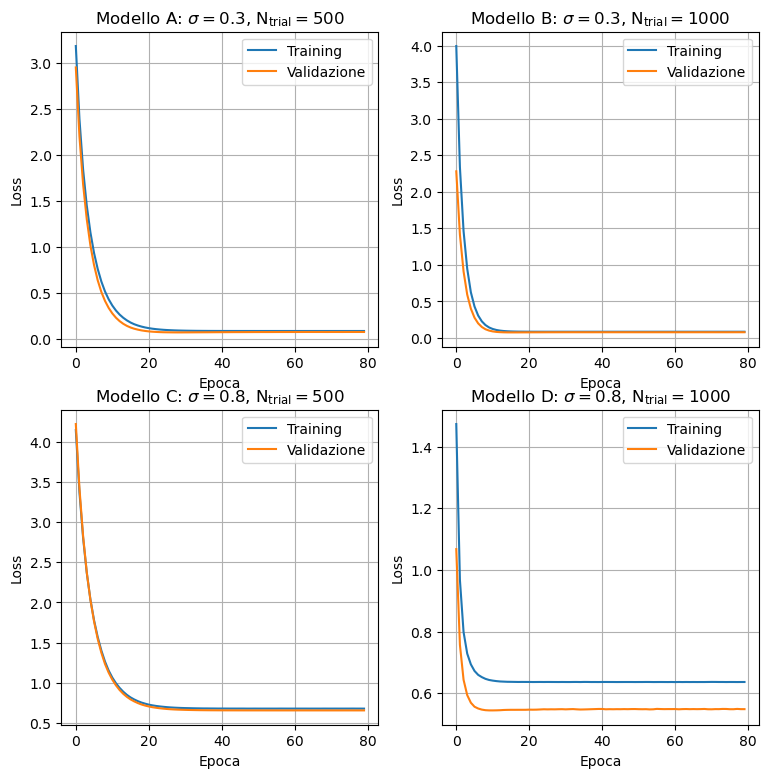

In [21]:
#plot dei valori della loss function di training vs validazione
lsfig, lsplt = plt.subplots(2, 2, figsize=(9, 9))

(lsplt1, lsplt2), (lsplt3, lsplt4) = lsplt

lsplt1.plot(as_history.history['loss'])
lsplt1.plot(as_history.history['val_loss'])
lsplt1.set_title(r'Modello A: $\sigma=0.3$, $\mathrm{N_{trial}}=500$')
lsplt1.set_ylabel('Loss')
lsplt1.set_xlabel('Epoca')
lsplt1.legend(['Training', 'Validazione'], loc='best')
lsplt1.grid(True)

lsplt2.plot(bs_history.history['loss'])
lsplt2.plot(bs_history.history['val_loss'])
lsplt2.set_title(r'Modello B: $\sigma=0.3$, $\mathrm{N_{trial}}=1000$')
lsplt2.set_ylabel('Loss')
lsplt2.set_xlabel('Epoca')
lsplt2.legend(['Training', 'Validazione'], loc='best')
lsplt2.grid(True)

lsplt3.plot(cs_history.history['loss'])
lsplt3.plot(cs_history.history['val_loss'])
lsplt3.set_title(r'Modello C: $\sigma=0.8$, $\mathrm{N_{trial}}=500$')
lsplt3.set_ylabel('Loss')
lsplt3.set_xlabel('Epoca')
lsplt3.legend(['Training', 'Validazione'], loc='best')
lsplt3.grid(True)

lsplt4.plot(ds_history.history['loss'])
lsplt4.plot(ds_history.history['val_loss'])
lsplt4.set_title(r'Modello D: $\sigma=0.8$, $\mathrm{N_{trial}}=1000$')
lsplt4.set_ylabel('Loss')
lsplt4.set_xlabel('Epoca')
lsplt4.legend(['Training', 'Validazione'], loc='best')
lsplt4.grid(True)

plt.show()

### Risultati a confronto

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


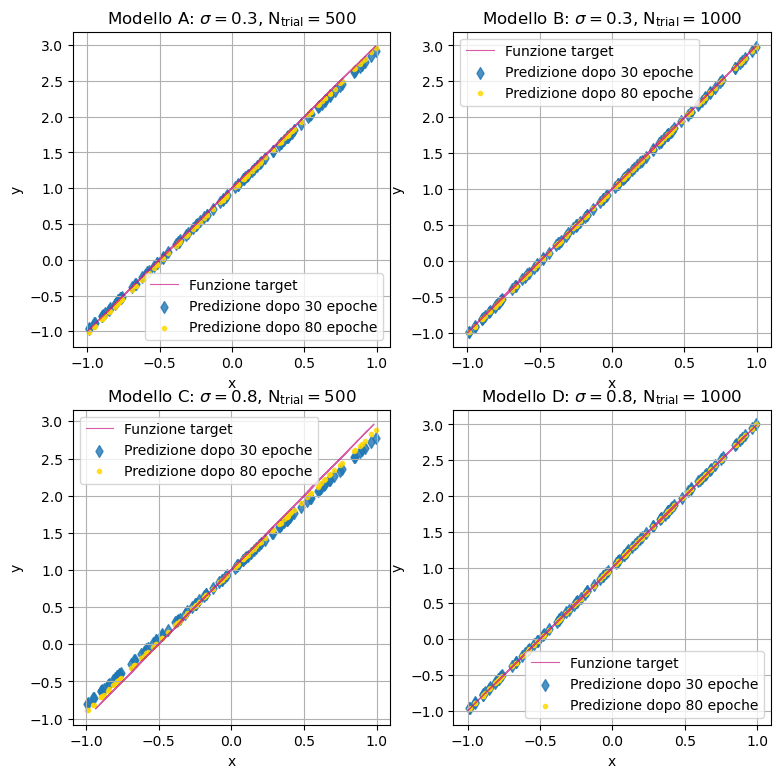

In [27]:
#risultati per ogni modello analizzato
x_pred=np.random.uniform(-1, 1, 100)

af_y_pred=af_model.predict(x_pred)
as_y_pred=as_model.predict(x_pred)

bf_y_pred=bf_model.predict(x_pred)
bs_y_pred=bs_model.predict(x_pred)

cf_y_pred=cf_model.predict(x_pred)
cs_y_pred=cs_model.predict(x_pred)

df_y_pred=df_model.predict(x_pred)
ds_y_pred=ds_model.predict(x_pred)

rfig, rplt = plt.subplots(2, 2, figsize=(9, 9))

(rplt1, rplt2), (rplt3, rplt4) = rplt

rplt1.plot(a_x_valid, a_y_target, color='mediumvioletred', label='Funzione target', linewidth=0.8, alpha=0.7)
rplt1.scatter(x_pred, af_y_pred, label='Predizione dopo 30 epoche', marker='d', alpha=0.8)
rplt1.scatter(x_pred, as_y_pred, label='Predizione dopo 80 epoche', marker='.', color='gold', alpha=0.8)
rplt1.set_xlabel('x')
rplt1.set_ylabel('y')
rplt1.set_title(r'Modello A: $\sigma=0.3$, $\mathrm{N_{trial}}=500$')
rplt1.legend()
rplt1.grid(True)

rplt2.plot(b_x_valid, b_y_target, color='mediumvioletred', label='Funzione target', linewidth=0.8, alpha=0.7)
rplt2.scatter(x_pred, bf_y_pred, label='Predizione dopo 30 epoche', marker='d', alpha=0.8)
rplt2.scatter(x_pred, bs_y_pred, label='Predizione dopo 80 epoche', marker='.', color='gold', alpha=0.8)
rplt2.set_xlabel('x')
rplt2.set_ylabel('y')
rplt2.set_title(r'Modello B: $\sigma=0.3$, $\mathrm{N_{trial}}=1000$')
rplt2.legend()
rplt2.grid(True)

rplt3.plot(c_x_valid, c_y_target, color='mediumvioletred', label='Funzione target', linewidth=0.8, alpha=0.7)
rplt3.scatter(x_pred, cf_y_pred, label='Predizione dopo 30 epoche', marker='d', alpha=0.8)
rplt3.scatter(x_pred, cs_y_pred, label='Predizione dopo 80 epoche', marker='.', color='gold', alpha=0.8)
rplt3.set_xlabel('x')
rplt3.set_ylabel('y')
rplt3.set_title(r'Modello C: $\sigma=0.8$, $\mathrm{N_{trial}}=500$')
rplt3.legend()
rplt3.grid(True)

rplt4.plot(d_x_valid, d_y_target, color='mediumvioletred', label='Funzione target', linewidth=0.8, alpha=0.7)
rplt4.scatter(x_pred, df_y_pred, label='Predizione dopo 30 epoche', marker='d', alpha=0.8)
rplt4.scatter(x_pred, ds_y_pred, label='Predizione dopo 80 epoche', marker='.', color='gold', alpha=0.8)
rplt4.set_xlabel('x')
rplt4.set_ylabel('y')
rplt4.set_title(r'Modello D: $\sigma=0.8$, $\mathrm{N_{trial}}=1000$')
rplt4.legend()
rplt4.grid(True)

plt.show()

In [28]:
#fai osservazioni varie...

## Esercizio 11.2

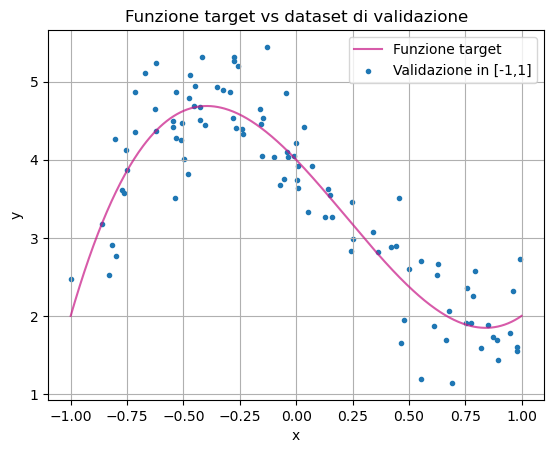

In [77]:
#funzione target è 3x^3-2x^2-3x+4 ergo i parametri target sono
a=3
b=-2
c=-3
d=4

#genero un modello con noise gaussiano
sigma=0.5

#genero dati di training in [-1,1]
n_train=1000
np.random.seed(0)
x_train=np.random.uniform(-1, 1, n_train)
y_train=np.random.normal(a*(x_train**3)+b*(x_train**2)+c*x_train+d, sigma) #effettivi dati per il training

#genero dati di validazione in [-1,1]
in_x_valid=np.random.uniform(-1, 1, int(n_train/10))
in_y_valid=np.random.normal(a*(in_x_valid**3)+b*(in_x_valid**2)+c*in_x_valid+d, sigma) #effettivi dati per la validazione

#genero anche punti target (i.e., ideali)
x_target=np.linspace(-1, 1, 400)
y_target=a*(x_target**3)+b*(x_target**2)+c*x_target+d

#plot
plt.plot(x_target, y_target, color='mediumvioletred', label='Funzione target', alpha=0.7)
plt.scatter(in_x_valid, in_y_valid, label='Validazione in [-1,1]', marker='.')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Funzione target vs dataset di validazione')
plt.legend()
plt.grid(True)
plt.show()

In [78]:
#compilazione e fitting con il dataset di validazione
pol_model=tf.keras.Sequential()
pol_model.add(Dense(3, input_dim=1, activation='tanh'))
pol_model.add(Dense(3, input_dim=1, activation='tanh'))
pol_model.add(Dense(1, activation='relu'))
pol_model.compile(loss='mse', optimizer='sgd', metrics=['mse'])
pol_model.summary()

in_history=pol_model.fit(x=x_train, y=y_train, 
          batch_size=20, epochs=100,
          shuffle=True,
          validation_data=(in_x_valid, in_y_valid))

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_51 (Dense)                │ (None, 3)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 3)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22 (88.00 B)

 Trainable params: 22 (88.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5.1975 - mse: 5.1975 - val_loss: 0.6327 - val_mse: 0.6327
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5815 - mse: 0.5815 - val_loss: 0.4617 - val_mse: 0.4617
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5145 - mse: 0.5145 - val_loss: 0.4237 - val_mse: 0.4237
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4799 - mse: 0.4799 - val_loss: 0.3979 - val_mse: 0.3979
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4663 - mse: 0.4663 - val_loss: 0.3878 - val_mse: 0.3878
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4531 - mse: 0.4531 - val_loss: 0.3686 - val_mse: 0.3686
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4032 - mse: 0.4032 - val_loss: 0.3620 - val_mse: 0.3620
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3994 - mse: 0.3994 - val_loss: 0.3382 - val_mse: 0.3382
Epoch 9/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.395

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


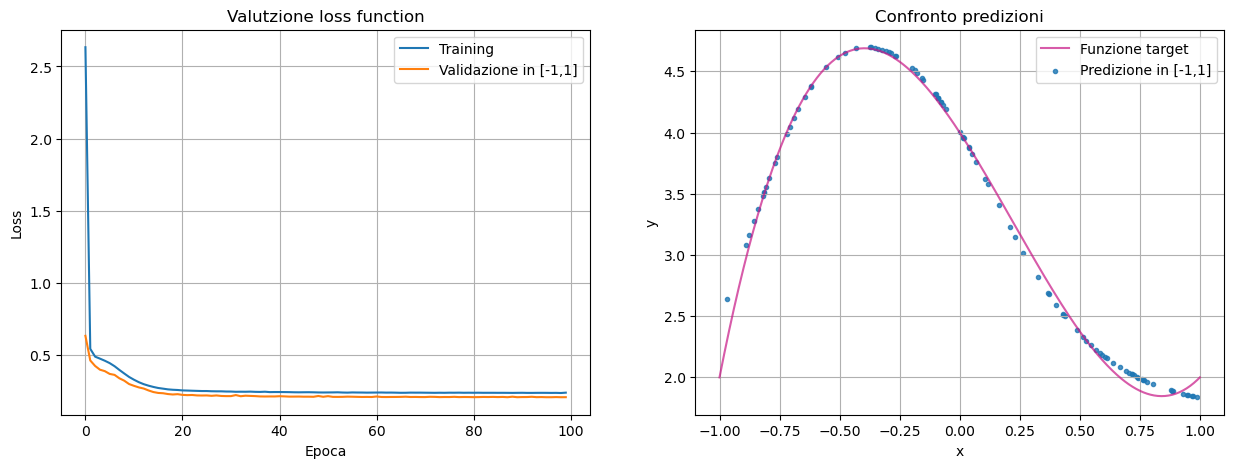

In [79]:
#risultati nel range di allenamento
in_x_pred=np.random.uniform(-1, 1, 100)
in_y_pred=pol_model.predict(in_x_pred)

rifig ,(riplt1, riplt2) = plt.subplots(1, 2, figsize=(15, 5))

riplt1.plot(in_history.history['loss'])
riplt1.plot(in_history.history['val_loss'])
riplt1.set_title('Valutzione loss function')
riplt1.set_ylabel('Loss')
riplt1.set_xlabel('Epoca')
riplt1.legend(['Training', 'Validazione in [-1,1]'], loc='best')
riplt1.grid(True)

riplt2.plot(x_target, y_target, color='mediumvioletred', label='Funzione target', alpha=0.7)
riplt2.scatter(in_x_pred, in_y_pred, label='Predizione in [-1,1]', marker='.', alpha=0.8)
riplt2.set_xlabel('x')
riplt2.set_ylabel('y')
riplt2.set_title('Confronto predizioni')
riplt2.legend(loc='upper right')
riplt2.grid(True)

plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


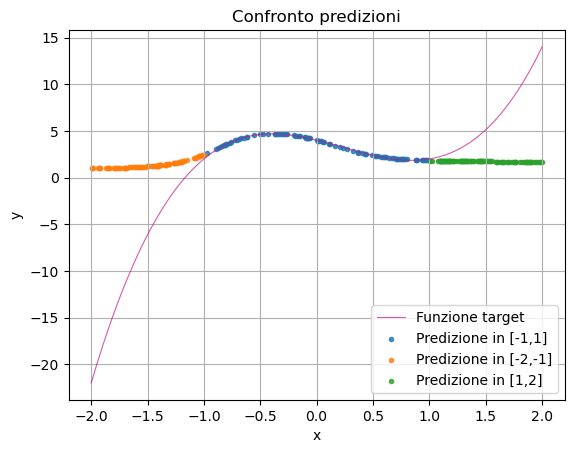

In [80]:
#provo a vedere cosa succede fuori dal range di allenamento e validazione
out1_x_pred=np.random.uniform(-2, -1, 100)
out1_y_pred=pol_model.predict(out1_x_pred)

out2_x_pred=np.random.uniform(1, 2, 100)
out2_y_pred=pol_model.predict(out2_x_pred)

x_fit=np.linspace(-2, 2, 400)
y_fit=a*(x_fit**3)+b*(x_fit**2)+c*x_fit+d

plt.plot(x_fit, y_fit, color='mediumvioletred', label='Funzione target', linewidth=0.8, alpha=0.7)
plt.scatter(in_x_pred, in_y_pred, label='Predizione in [-1,1]', marker='.', alpha=0.8)
plt.scatter(out1_x_pred, out1_y_pred, label='Predizione in [-2,-1]', marker='.', alpha=0.8)
plt.scatter(out2_x_pred, out2_y_pred, label='Predizione in [1,2]', marker='.', alpha=0.8)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Confronto predizioni')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [57]:
#noto che aggiungere troppi neuroni dà risultati sballati, idem aggiungere troppi layer (credo che bisognerebbe capire come settarli in base al numero di parametri), idem mettere relu come attivazione di input o usare la sigmoide o usare tanh su livello output

## Esercizio 11.3

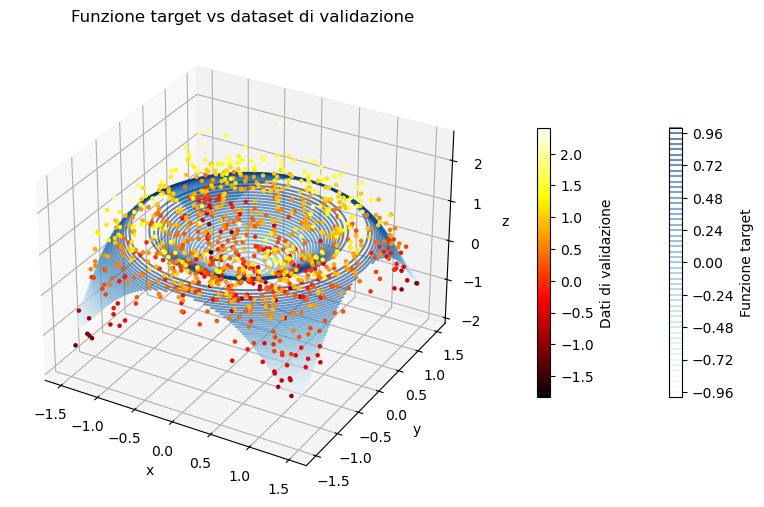

In [118]:
#funzione target è sin(x^2+y^2) ergo i parametri target sono

#genero un modello con noise gaussiano
s_sigma=0.5

#genero dati di training e validazione con x e y in [-1.5,1.5]
s_n_train=10000
np.random.seed(0)

s_x_train=np.random.uniform(-1.5, 1.5, s_n_train)
s_y_train=np.random.uniform(-1.5, 1.5, s_n_train)
s_z_train=np.random.normal(np.sin(s_x_train**2 + s_y_train**2), s_sigma) #effettivi dati per il training

s_x_valid=np.random.uniform(-1.5, 1.5, int(s_n_train/10))
s_y_valid=np.random.uniform(-1.5, 1.5, int(s_n_train/10))
s_z_valid=np.random.normal(np.sin(s_x_valid**2 + s_y_valid**2), s_sigma) #effettivi dati per la validazione

#plot
#genero punti target (i.e., ideali)
s_x_target=np.linspace(-1.5, 1.5, 1000)
s_y_target=np.linspace(-1.5, 1.5, 1000)
X, Y=np.meshgrid(s_x_target, s_y_target)
Z=np.sin(X**2 + Y**2)

fig=plt.figure(figsize=(10, 7))
ax=fig.add_subplot(111, projection='3d')
c=ax.contour3D(X, Y, Z, 50, cmap='Blues', alpha=0.6)
s=ax.scatter(s_x_valid, s_y_valid, s_z_valid, marker='.', c=s_z_valid, cmap='hot', alpha=1)
plt.colorbar(c, ax=ax, pad=0.05, label='Funzione target', shrink=0.5)
plt.colorbar(s, ax=ax, pad=0.1, label='Dati di validazione', shrink=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Funzione target vs dataset di validazione')
plt.show()

In [112]:
#compilazione e fitting con il dataset di validazione
s_train=np.column_stack((s_x_train, s_y_train))
s_valid=np.column_stack((s_x_valid, s_y_valid))

s_model=tf.keras.Sequential()
s_model.add(Dense(10, input_shape=(2,), activation='tanh'))
s_model.add(Dense(10, activation='tanh'))
s_model.add(Dense(10, activation='tanh'))
s_model.add(Dense(1, activation='relu'))
s_model.compile(loss='mse', optimizer='sgd', metrics=['mse'])
s_model.summary()

s_history=s_model.fit(x=s_train, y=s_z_train,
          batch_size=100, epochs=300,
          shuffle=True,
          validation_data=(s_valid, s_z_valid))

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_69 (Dense)                │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_72 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 261 (1.02 KB)

 Trainable params: 261 (1.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5435 - mse: 0.5435 - val_loss: 0.3936 - val_mse: 0.3936
Epoch 2/300
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4062 - mse: 0.4062 - val_loss: 0.3913 - val_mse: 0.3913
Epoch 3/300
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3989 - mse: 0.3989 - val_loss: 0.3895 - val_mse: 0.3895
Epoch 4/300
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4038 - mse: 0.4038 - val_loss: 0.3913 - val_mse: 0.3913
Epoch 5/300
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4029 - mse: 0.4029 - val_loss: 0.3928 - val_mse: 0.3928
Epoch 6/300
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3903 - mse: 0.3903 - val_loss: 0.3877 - val_mse: 0.3877
Epoch 7/300
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4007 - mse: 0.4007 - val_loss: 0.3875 - val_mse: 0.3875
Epoch 8/300
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3987 - mse: 0.3987 - val_loss: 0.3891 - val_mse: 0.3891
Epoch 9/300
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/

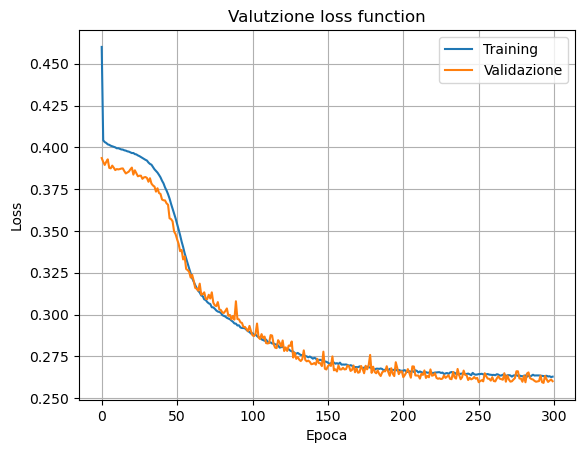

In [113]:
plt.plot(s_history.history['loss'])
plt.plot(s_history.history['val_loss'])
plt.title('Valutzione loss function')
plt.ylabel('Loss')
plt.xlabel('Epoca')
plt.legend(['Training', 'Validazione'], loc='best')
plt.grid(True)
plt.show()

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


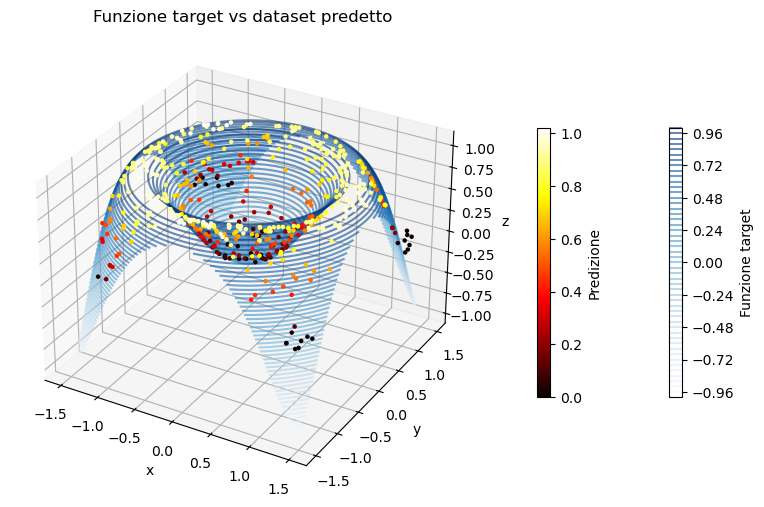

In [119]:
#plot predizione
s_x_pred=np.random.uniform(-1.5, 1.5, 500)
s_y_pred=np.random.uniform(-1.5, 1.5, 500)
s_z_pred=s_model.predict(np.column_stack((s_x_pred, s_y_pred)))

fig=plt.figure(figsize=(10, 7))
ax=fig.add_subplot(111, projection='3d')
c=ax.contour3D(X, Y, Z, 50, cmap='Blues', alpha=0.6)
s=ax.scatter(s_x_pred, s_y_pred, s_z_pred, marker='.', c=s_z_pred, cmap='hot', alpha=1)
plt.colorbar(c, ax=ax, pad=0.05, label='Funzione target', shrink=0.5)
plt.colorbar(s, ax=ax, pad=0.1, label='Predizione', shrink=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Funzione target vs dataset predetto')
plt.show()

In [120]:
#c'è overfitting?